In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\Downloads\\Spreadsheets-20231017T124722Z-001\\Spreadsheets\\NEDL_Distributions.xlsx',index_col='Unnamed: 0')[:-3][['S&P 500','Return']]
df

,S&P 500,Return
2014-12-31,2058.9,NaN
2015-01-02,2058.2,-0.000340
2015-01-05,2020.58,-0.018278
2015-01-06,2002.61,-0.008893
2015-01-07,2025.9,0.011630
...,...,...
2019-12-24,3223.38,-0.000195
2019-12-26,3239.91,0.005128
2019-12-27,3240.02,0.000034
2019-12-30,3221.29,-0.005781


In [3]:
returns=df['S&P 500'].pct_change()
returns

2014-12-31         NaN
2015-01-02   -0.000340
2015-01-05   -0.018278
2015-01-06   -0.008893
2015-01-07    0.011630
                ...   
2019-12-24   -0.000195
2019-12-26    0.005128
2019-12-27    0.000034
2019-12-30   -0.005781
2019-12-31    0.002946
Name: S&P 500, Length: 1259, dtype: float64

In [4]:
returns.mean(),returns.std()

(0.0003940689650376352, 0.008461507257850628)

In [5]:
df['Rank']=[i for i in range(0,len(df))]
df

,S&P 500,Return,Rank
2014-12-31,2058.9,NaN,0
2015-01-02,2058.2,-0.000340,1
2015-01-05,2020.58,-0.018278,2
2015-01-06,2002.61,-0.008893,3
2015-01-07,2025.9,0.011630,4
...,...,...,...
2019-12-24,3223.38,-0.000195,1254
2019-12-26,3239.91,0.005128,1255
2019-12-27,3240.02,0.000034,1256
2019-12-30,3221.29,-0.005781,1257


In [6]:
df['Ranked Return']=df['Return'].sort_values(ascending=True).values
df['Ranked Return']=df['Ranked Return'].shift(1)
df['Emperical Cumulative Distribution']=df.Rank/1259
n,minmax,mean,var,skew,kurt=stats.describe(df['Return'].fillna(0))
overly=np.linspace(minmax[0],minmax[1],n)
df['Normal Cumulative Distrinution']=norm.cdf(overly,mean,var**0.5)
df

,S&P 500,Return,Rank,Ranked Return,Emperical Cumulative Distribution,Normal Cumulative Distrinution
2014-12-31,2058.9,NaN,0,NaN,0.000000,5.003653e-07
2015-01-02,2058.2,-0.000340,1,-0.040979,0.000794,5.224657e-07
2015-01-05,2020.58,-0.018278,2,-0.039414,0.001589,5.455040e-07
2015-01-06,2002.61,-0.008893,3,-0.037536,0.002383,5.695183e-07
2015-01-07,2025.9,0.011630,4,-0.035920,0.003177,5.945482e-07
...,...,...,...,...,...,...
2019-12-24,3223.38,-0.000195,1254,0.025083,0.996029,1.000000e+00
2019-12-26,3239.91,0.005128,1255,0.027157,0.996823,1.000000e+00
2019-12-27,3240.02,0.000034,1256,0.034336,0.997617,1.000000e+00
2019-12-30,3221.29,-0.005781,1257,0.039034,0.998411,1.000000e+00


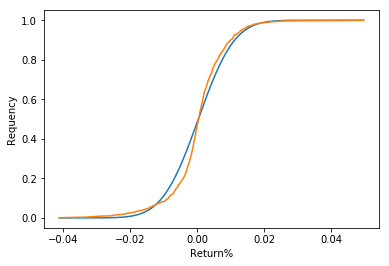

In [7]:
x=norm.rvs(mean,var**0.5,n)
plt.plot(overly,np.array(df['Normal Cumulative Distrinution']))
plt.plot(np.array(df['Ranked Return']),np.array(df['Emperical Cumulative Distribution']))
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [8]:
pi=3.141592653589793#PI: 3.141592653589793
average=df['Return'].mean()
standard_deviation=df['Return'].std()
df['Hypersecant Cumulative Distribuion']=np.exp(pi/2*((df['Ranked Return'].fillna(0)-average)/standard_deviation)).apply(lambda x: (2/pi)*math.atan(x))
df

,S&P 500,Return,Rank,Ranked Return,Emperical Cumulative Distribution,Normal Cumulative Distrinution,Hypersecant Cumulative Distribuion
2014-12-31,2058.9,NaN,0,NaN,0.000000,5.003653e-07,0.476735
2015-01-02,2058.2,-0.000340,1,-0.040979,0.000794,5.224657e-07,0.000294
2015-01-05,2020.58,-0.018278,2,-0.039414,0.001589,5.455040e-07,0.000393
2015-01-06,2002.61,-0.008893,3,-0.037536,0.002383,5.695183e-07,0.000557
2015-01-07,2025.9,0.011630,4,-0.035920,0.003177,5.945482e-07,0.000752
...,...,...,...,...,...,...,...
2019-12-24,3223.38,-0.000195,1254,0.025083,0.996029,1.000000e+00,0.993493
2019-12-26,3239.91,0.005128,1255,0.027157,0.996823,1.000000e+00,0.995573
2019-12-27,3240.02,0.000034,1256,0.034336,0.997617,1.000000e+00,0.998832
2019-12-30,3221.29,-0.005781,1257,0.039034,0.998411,1.000000e+00,0.999512


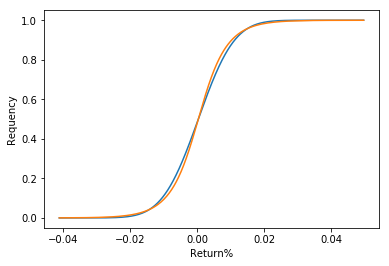

In [9]:
plt.plot(overly,np.array(df['Normal Cumulative Distrinution']))
plt.plot(np.array(df['Ranked Return']),np.array(df['Hypersecant Cumulative Distribuion']))
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [10]:
df['Return'].mean()

0.0003940689650376352

In [11]:
df['Return'].std()

0.008461507257850628